<a href="https://colab.research.google.com/github/emilianog4/Data-Science-Projects/blob/main/Analysis_of_Data_Science_Salaries_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar kaggle

In [1]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Subo el kaggle.json de mi cuenta

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emilianogutierrez4","key":"232fc2593143ee01001b613948a44b67"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 74 Apr 26 16:20 kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

# Cargo el dataset de kaggle, en este caso ***los salarios de data science en 2023***

In [6]:
!kaggle datasets download -d 'arnabchaki/data-science-salaries-2023'

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 1.43MB/s]


## como se descarga en un archivo .zip lo tengo que descomprimir para utilizarlo

In [7]:
!unzip 'data-science-salaries-2023.zip'

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


# Importo las librerias de pandas y numpy

In [8]:
import pandas as pd
import numpy as np

# Leo el dataset de ds_salaries.csv y veo que columnas contiene

In [9]:
df = pd.read_csv('ds_salaries.csv')
#unique_values = df.job_title.unique()
#unique_values

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Creo una nueva columna "salario en pesos argentinos" 
### Para esto multiplico la columna de salario en dolares * 450 que es el precio actual del dolar en Argentina 

In [10]:
df['salary_in_pesos_argentinos'] = df['salary_in_usd'] * 450
df['salary_in_pesos_argentinos']

0        38631150
1        13500000
2        11475000
3        78750000
4        54000000
          ...    
3750    185400000
3751     67950000
3752     47250000
3753     45000000
3754     42599250
Name: salary_in_pesos_argentinos, Length: 3755, dtype: int64

# Ordeno los valores de la columna salario en pesos argentinos de menor a mayor 

In [11]:
df['salary_in_pesos_argentinos'].sort_values(ascending=True)

2684      2309400
2578      2434050
3537      2434050
3667      2555550
3685      2568150
          ...    
3675    187200000
3747    190350000
528     190725300
2011    193935150
3522    202500000
Name: salary_in_pesos_argentinos, Length: 3755, dtype: int64

# Creo una nueva columna con el salario por mes expresado en pesos argentinos

In [12]:
df['salary_per_month'] = df['salary_in_pesos_argentinos'] / 12
df['salary_per_month'].sort_values()

2684      192450.0
2578      202837.5
3537      202837.5
3667      212962.5
3685      214012.5
           ...    
3675    15600000.0
3747    15862500.0
528     15893775.0
2011    16161262.5
3522    16875000.0
Name: salary_per_month, Length: 3755, dtype: float64

# Me posiciono en la fila del salario menor y observo que el job_title = NLP Engineer

In [13]:
df.loc[2684]

work_year                             2022
experience_level                        MI
employment_type                         FT
job_title                     NLP Engineer
salary                              120000
salary_currency                        CZK
salary_in_usd                         5132
employee_residence                      CZ
remote_ratio                           100
company_location                        CZ
company_size                             M
salary_in_pesos_argentinos         2309400
salary_per_month                  192450.0
Name: 2684, dtype: object


# Me posiciono en la fila del salario Mayor y observo que el job_title = Research Scientist





In [14]:
df.loc[3522]

work_year                                   2020
experience_level                              MI
employment_type                               FT
job_title                     Research Scientist
salary                                    450000
salary_currency                              USD
salary_in_usd                             450000
employee_residence                            US
remote_ratio                                   0
company_location                              US
company_size                                   M
salary_in_pesos_argentinos             202500000
salary_per_month                      16875000.0
Name: 3522, dtype: object

In [15]:
df['company_size'].unique() # tamaño de la compania grande, pequeña o mediana

array(['L', 'S', 'M'], dtype=object)

In [16]:
df['experience_level'].unique() # nivel de experiencia del empleado
# SE : Senior.
# EN : Entry level.
# EX : Executive level.
# MI : Mid/Intermediate level. 

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [17]:
df['employment_type'].unique() # full time , part time , etc

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

# Ahora filtro para ver los datos de los empleados de Entry Level

In [18]:
df.loc[df['experience_level'] == 'EN']
df['salary_in_usd'].sort_values()

2684      5132
2578      5409
3537      5409
3667      5679
3685      5707
         ...  
3675    416000
3747    423000
528     423834
2011    430967
3522    450000
Name: salary_in_usd, Length: 3755, dtype: int64

In [19]:
df.loc[83] # el empleado con el mayor sueldo de Entry Level

work_year                             2022
experience_level                        EN
employment_type                         FT
job_title                     AI Developer
salary                              300000
salary_currency                        USD
salary_in_usd                       300000
employee_residence                      IN
remote_ratio                            50
company_location                        IN
company_size                             L
salary_in_pesos_argentinos       135000000
salary_per_month                11250000.0
Name: 83, dtype: object

In [20]:
df.loc[2578] # el empleado con el menor sueldo de Entry Level

work_year                                   2021
experience_level                              EN
employment_type                               FT
job_title                     Power BI Developer
salary                                    400000
salary_currency                              INR
salary_in_usd                               5409
employee_residence                            IN
remote_ratio                                  50
company_location                              IN
company_size                                   L
salary_in_pesos_argentinos               2434050
salary_per_month                        202837.5
Name: 2578, dtype: object

# Histograma de los **salarios en dolares**

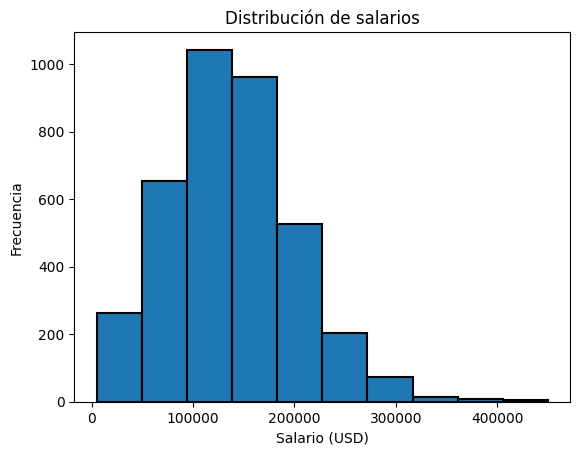

In [21]:
import matplotlib.pyplot as plt

# Creo un histograma de la columna salary_in_usd
plt.hist(df['salary_in_usd'], bins=10, edgecolor='black', linewidth=1.5)

# Añadir etiquetas y título
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.title('Distribución de salarios')

# Mostrar el histograma
plt.show()

# Grafico de dispersion de **salario en dolares** vs **nivel de experiencia**

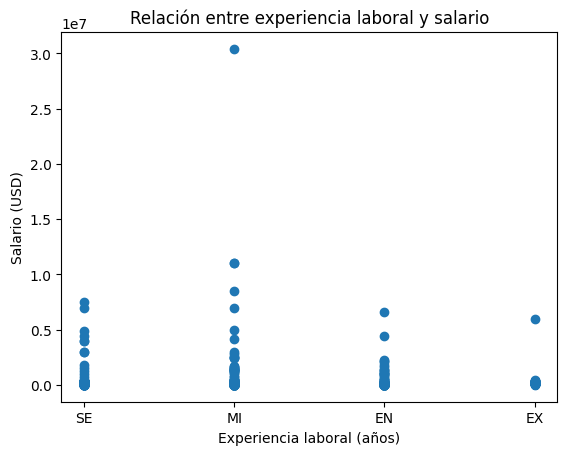

In [35]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de salary_in_usd y experience_level
plt.scatter(df['experience_level'], df['salary'])

# Añadir etiquetas y título
plt.xlabel('Experiencia laboral (años)')
plt.ylabel('Salario (USD)')
plt.title('Relación entre experiencia laboral y salario')

# Mostrar el gráfico
plt.show()


# Grafico de torta que muestra el porcentaje de trabajadores en remoto, hibrido o presencial 

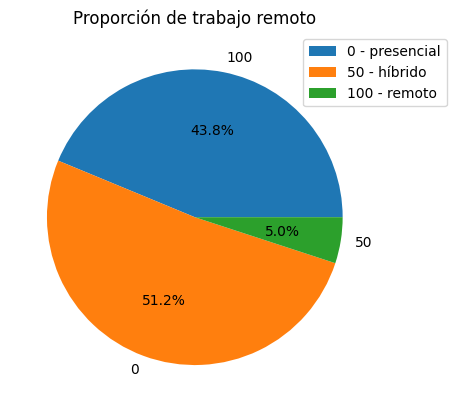

In [48]:
# Creo una lista con los valores únicos de la columna "remote_ratio"
ratios = df["remote_ratio"].unique()

# Contar cuántas veces aparece cada valor en la columna "remote_ratio"
counts = [len(df[df["remote_ratio"] == ratio]) for ratio in ratios]

# Creo un gráfico de torta con los valores de "counts" y las etiquetas de "ratios"
plt.pie(counts, labels=ratios, autopct='%1.1f%%')
# Título del gráfico
plt.title("Proporción de trabajo remoto")

# Creo una lista con las etiquetas de la leyenda
labels = ["0 - presencial", "50 - híbrido", "100 - remoto"]

# Agregar la leyenda al gráfico
plt.legend(labels, loc="best", bbox_to_anchor=(1.2, 1))

# Mostrar el gráfico
plt.show()

In [36]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'salary_in_pesos_argentinos', 'salary_per_month'],
      dtype='object')